In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
Loan_dataset= pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
Loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
Loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
Loan_dataset.shape

(614, 13)

In [5]:
Loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
Loan_dataset= Loan_dataset.dropna()

In [7]:
Loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
Loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [9]:
Loan_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [10]:
Loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
Loan_dataset.shape

(480, 13)

In [12]:
Loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [13]:
Loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace= True)
Loan_dataset[ 'Loan_Status']= Loan_dataset['Loan_Status'].astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8320\2528436561.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace= True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8320\2528436561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace= True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8320\2528436561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [14]:
Loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
Loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [16]:
Loan_dataset.replace({'Dependents':{'3+':4}}, inplace= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8320\2957667865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_dataset.replace({'Dependents':{'3+':4}}, inplace= True)


In [17]:
Loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

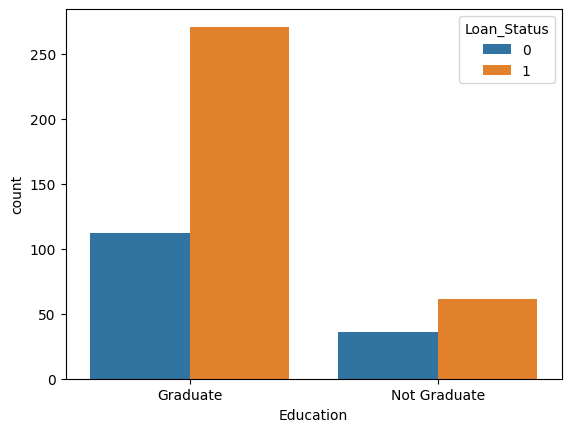

In [18]:
sns.countplot(x= 'Education', hue= 'Loan_Status', data= Loan_dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

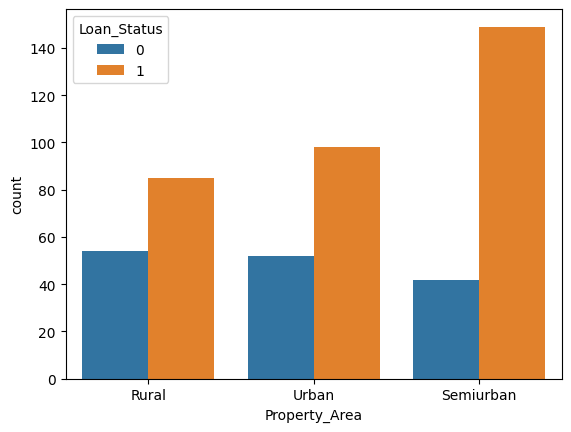

In [19]:
sns.countplot(x='Property_Area', hue= 'Loan_Status', data= Loan_dataset)

In [20]:
Loan_dataset.replace({'Married':{'No':0, 'Yes':1}, 'Gender':{'Male':0, 'Female':1}, 'Education':{'Not Graduate':0, 'Graduate':1}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area': {'Rural':0, 'Urban':1, 'Semiurban':2}}, inplace= True)
                                                                                                                                                     
                                                                                                                                                     
                                                                                                                                                

C:\Users\Admin\AppData\Local\Temp\ipykernel_8320\1830925201.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Loan_dataset.replace({'Married':{'No':0, 'Yes':1}, 'Gender':{'Male':0, 'Female':1}, 'Education':{'Not Graduate':0, 'Graduate':1}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area': {'Rural':0, 'Urban':1, 'Semiurban':2}}, inplace= True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8320\1830925201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_dataset.replace({'Married':{'No':0, 'Yes':1}, 'Gender':{'M

In [21]:
Loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [22]:
X= Loan_dataset.drop(columns= ['Loan_ID', 'Loan_Status'])
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [23]:
Y= Loan_dataset['Loan_Status']
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [27]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[-0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694, -1.34825769],
       [-0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694, -0.13178459],
       [-0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694, -0.13178459],
       ...,
       [-0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694, -0.13178459],
       [-0.46719815,  0.73716237,  0.92945899, ...,  0.27554157,
         0.41319694, -0.13178459],
       [ 2.14041943, -1.35655324, -0.70475462, ...,  0.27554157,
        -2.42015348,  1.08468851]], shape=(480, 11))

In [28]:
X_train, X_test, Y_train,Y_test= train_test_split(X,Y, test_size= 0.1, stratify= Y,  random_state= 2)


In [29]:
model =svm.SVC(kernel= 'linear')
model

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [30]:
model.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [31]:
X_train_predict= model.predict(X_train)
X_train_accuracy = accuracy_score(Y_train, X_train_predict)
X_train_accuracy*100

80.55555555555556

In [32]:
X_test_predict= model.predict(X_test)
X_test_accuracy= accuracy_score(Y_test, X_test_predict)
X_test_accuracy*100

83.33333333333334